# Trabalho de grupo
##### Elementos do grupo:
- Guilherme Sousa Silva Martins, A92847
- Maria Miguel de Oliveira Soares, A92826

##### Mestrado Integrado em Engenharia Física - 1º Ano - 2º Semestre;      Universidade do Minho;    2020
### - Unidade Curricular: Dados e Computação (DC);                         Professor: Jorge Sousa Pinto

##### Bibliografia: 'Automata and Computability: A Programmer's Perspective', por Ganesh Gopalakrishnan

ESPAÇO DEDICADO à Importação de funções do JOVE:

In [1]:
import sys
sys.path[0:0] = ['..','../3rdparty'] # Put these at the head of the search path

# Make imports better (narrower) eventually
from jove.ShrinkStates import shrink_dfastates
from jove.ShrinkStates import shrink_nfastates
from jove.ShrinkStates import mkSSnam
from jove.Module3_DFA  import mk_dfa
from jove.DotBashers          import *
from jove.TransitionSelectors import *
from jove.SystemImports       import *

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

The DFA are NOT language equivalent!
Path leading to counterexample is: 
[(('IF', 'IF'), ('IF', 'IF')), (('A', 'A'), ('A', 'A')), (('B', 'B'), ('B', 'B'))]


Os conjuntos de funções importados anteriormente pretencem ao JOVE e serão bastante úteis para a construção de autómatos.

# Autómatos não determinísticos (NFA) 

Outra vertente dos autómatos para além dos determinísticos são os **autómatos não determinísticos**. 


Formalmente, um autómato não determinístico caracteriza-se por ser um tuplo $(Q, \Sigma, \delta, Q_0,F)$

  * $Q$ - representa o conjunto de estados do autómato, finito e não vazio de estados;
  * $\Sigma$ - representa o alfabeto de simbolos, igualmente, finito e não vazio;
  * $\delta$ - é uma função de transição (total, ou seja, está definida para todos os *inputs*), representa o conjunto de transições, ;
  * $Q_0$ - representa o conjunto de estados iniciais do autómato;
  * $F$ - representa o conjunto de estado finais do autómato e possivelmente vazio.
  
Antes de iniciarmos o estudo dos autómatos não-determinísticos (NFA), precismaos de relembrar que um DFA (autómato determinístico finito) é um tuplo $(Q, \Sigma, \delta, Q_0,F)$. As diferenças dos NFA relativamente aos DFAs são apenas duas:

* o tipo da função de transição é agora $\delta : Q \times \Sigma_\varepsilon \to \mathcal{P}(Q)$, ou seja, cada transição resulta num _conjunto de estados_ (ao invés de num único estado como nos DFAs), e por outro lado as transições podem estar associadas à palavra vazia, ou seja, pode não ser consumido qualquer símbolo durante uma transição

* existe agora um _conjunto de estados iniciais_, em vez de um único como nos DFAs




## Construção de Autómatos Não-Determinísticos (NFA)



Agora virando para o nosso foco ao nível do Jove, um autómato não determinístico será também representado por um dicionários com 5 campos, onde então cada campo seguirá as características já referidas para cada um deles, anteriormente. 

De seguida, vamos então exemplificar como é então descrito um autómato com base em dicionários. 

In [2]:
NFA_antep1a = { 'Q': {'I', 'S0', 'S1', 'F'},
                'Sigma': {'0', '1'},
                'Delta': {   # 
                             ('I', '0')  : {'I'},
                             ('I', '1')  : {'I', 'S0'},
                             #
                             ('S0', '0') : {'S1'},
                             ('S0', '1') : {'S1'},
                             #
                             ('S1', '0') : {'F'},
                             ('S1', '1') : {'F'}},
                  'Q0': {'I'}, 
                  'F' : {'F'}   
               }

NFA_antep1a




{'Q': {'F', 'I', 'S0', 'S1'},
 'Sigma': {'0', '1'},
 'Delta': {('I', '0'): {'I'},
  ('I', '1'): {'I', 'S0'},
  ('S0', '0'): {'S1'},
  ('S0', '1'): {'S1'},
  ('S1', '0'): {'F'},
  ('S1', '1'): {'F'}},
 'Q0': {'I'},
 'F': {'F'}}

Ora, será então importante notar que:
* os campos $Q$, $\Sigma$, $Q_0$ e $F$ são conjuntos;

* o campo Delta, é tal como nos DFAs ainda um dicionário - a estrutura adequada para a representação de funções. As chaves deste dicionário são pares (estado, símbolo), e os valores são _conjuntos de estados_ resultantes de cada transição.

Para a visualização dos NFA, vamos fazer uso de uma função específica para tal, a `dotObj_nfa`. Onde ilustrámos de seguida a sua aplicação. 


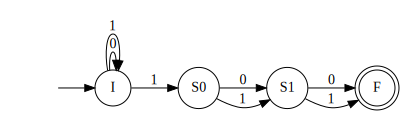

In [3]:
dotObj_nfa(NFA_antep1a)

Como, inicialmente, referimos estes autómatos tem a particularidade de as transições poderem estar associadas à palavra vazia,  pelo que como os símbolos são representados por uma string, é importante notar que para estes casos onde as transições não consomem qualquer símbolo utilzaremos simplesmente a string vazia, como no exemplo seguinte mostrámos:

In [4]:
NFA_antep1b = { 'Q': {'I', 'S0', 'S1', 'S2', 'F'},
                'Sigma': {'0', '1'},
                'Delta': {   # 
                             ('I', '0')  : {'I'},
                             ('I', '1')  : {'I'},
                             ('I', '')   : {'S0'},
                             #
                             ('S0', '1') : {'S1'},
                             # ('S0', '0') : set({}),
                             #
                             ('S1', '0') : {'S2'},
                             ('S1', '1') : {'S2'},
                             #
                             ('S2', '0') : {'F'},
                             ('S2', '1') : {'F'} },
                             #
                             # ('F', '0') : set({}),
                             # ('F', '1') : set({}),

                  'Q0': {'I'}, 
                  'F' : {'F'}   
                }


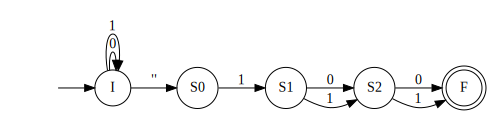

In [5]:
dotObj_nfa(NFA_antep1b)

### Coerência dos Autómatos (exercício proposto pelo professor)
Tal como nos DFAs, é útil ter uma função que testa a coerência de um autómato não-determinístico, ou seja, dado um dicionário do tipo acima, verifica se: 
* o conjunto de estados e o alfabeto não são vazios
* o domínio do dicionário correspondente à função de transição _está contido_ em $Q \times \Sigma_\varepsilon$ (trata-se de coerência parcial)
* a função de transição apenas leva a execução a estados pertencentes a $Q$
* os conjuntos de estados iniciais e finais estão contidos em $Q$

Assim, podemos ver a aplicação da função `is_consistent_nfa` que existe no Jove. A função devolve True caso se verifique a coerência e devolve False no caso contrário.

Então, podemos desta forma verificar se o NFA inical do notebook é consistente ou não:

In [6]:
is_consistent_nfa(NFA_antep1b)

True

Ora, para a nossa definição da função `is_consistent_nfa_DC`, tivemos então como raciocínio base as condições já referidas. Deste modo, abordaremos como foi aplicado na função cada um dos pontos:

*  **Conjunto de estados e alfabeto**

    Relativamente, ao conjunto de estados e ao alfabeto apenas precisámos de garantir que não são conjuntos vazios, ou seja, $Q$ != {} e $\Sigma$ != {}.
    
    
* **Domínio da função de transição**

    Segundo a definição temos que garantir que o domínio da função de transição, ou seja, o domínio correpondente ao dicionário Delta ($\delta$) está contido no conjunto resultante do produto cartesiano entre $Q$  e $\Sigma_\varepsilon$. Assim, precisámos simplesmente de criar um novo alfabeto, que é simplesmente o alfabeto de símbolos inicial do autómato mais a palavra vazia $\varepsilon$, já que os NFA permitem transições a partir da leitura da palavra vazia. Posto isto indicámos simplesmente que o domínio de delta ($\delta$) tem de estar contido em $Q \times \Sigma_\varepsilon$.  
    
    
* **Função de transição**

    Para que a função de transição apenas leve a estados que pertencem ao conjunto de estados do autómato, utilizámos como ajuda a função `termina_em_Q`. Esta função irá então verificar se existe algum elemento da lista no co-domínio do função de transição que não pertença ao conjunto de estados. Caso isto se verifique a função irá retornar False, caso contrário retorna True, significando que a função de transição leva somente a estados do conjunto $Q$. 
    
    
* **Conjuntos de estados iniciais e finais**
    
    Precisámos de garantir também que o conjunto de estados iniciais, assim como, o de estados finais são um sub-conjunto do conjunto de estados $Q$ do autómato. 
   
  

In [7]:
def termina_em_Q (D):
        
        range_Delta = list(fn_range(D["Delta"]))
        todosPertencem = True 

        for n in range_Delta:
            for i in n:
                if i not in D["Q"]:
                    todosPertencem = False
                else:
                    todosPertencem = True
            
        return todosPertencem                

In [8]:
def is_consistent_nfa_DC (D):
    Q     = D["Q"]
    Sigma = D["Sigma"]
    Delta = D["Delta"]
    Q0    = D["Q0"]
    F     = D["F"]

    dom_delta   = set(fn_dom(Delta))
    range_Delta = list(fn_range(Delta))
    Sigma_E= (Sigma | set ({""}))

    return (Q != {}     and
        Sigma != {}          and
        dom_delta   <= set(product(Q,Sigma_E)) and
        Q0 <= Q              and
        termina_em_Q(D)== True       and
        F <= Q)  

Assim, de seguida podemos verificar a aplicação da função `is_consistent_nfa_DC`.

In [9]:
is_consistent_nfa_DC(NFA_antep1b)

True

### Totalização de um Autómato  (exercício proposto pelo professor)

Observando, o autómato `NFA_antep1b` verificámos que não está definida nenhuma transição a partir de __S0__ com o símbolo __0__, ou seja, trata-se de uma função parcial. No entanto, esta parcialidade não viola de forma alguma a definição de um NFA,  uma vez que o autómato é para todos os efeitos equivalente ao que se obteria acrescentando a transição seguinte:

`('S0', '0') : set({}),`

Por outras palavras, a operação de totalização em NFAs não obriga à introdução de um estado "black hole", bastanto acrescentar na função de transição mapeamentos para o conjunto vazio de estados, como ilustrado acima. Assim, este será o objetivo ao construirmos uma função de totalização para um NFA, não acrescentando um estado de BH mas sim as transições que não estão incluídas como a já referida. 

Relativamente à função de totalização passámos por duas etapas:

> 1.   Para criarmos as transições que nos faltam para a transição do autómato vamos fazer uso da função `extra_delta`. Esta função, primeiramente, irá criar uma lista de pares (x,y), onde x é cada um dos estados do autómato e y é cada um dos símbolos do alfabeto mais $\varepsilon$. 
    De seguida, vamos então criar um dicionário (extra_delta), onde para cada par da lista anterior que não esteja contido no domínio da função de transição, será associado o valor _set ({})_. 
    
> 2. Relativamente então a `totalize_dfa`, se for garantida a coerência do autómato, vamos simplesmente criar uma nova função de transição que resultará da junção do dicionário a partir de `extra_delta` e do dicionário que constituí a função de transição inicial do autómato. 

Apresentámos, de seguida, as exemplificações desta função.


In [10]:
def extra_delta (D):
        Q     = D["Q"]
        Sigma = D["Sigma"]
        Delta = D["Delta"]
        Q0    = D["Q0"]
        F     = D["F"]
        
        Sigma_E = (D["Sigma"] | {""}) 
        estado_simbolo = []
        
        for x in Q:
            for y in Sigma_E:
                estado_simbolo.append((x, y))
    
        extra_delta = {i: set ({}) 
                    for i in estado_simbolo 
                    if i not in fn_dom(Delta)}
            
        return (extra_delta) 
        

In [11]:
print (extra_delta (NFA_antep1b))


{('S0', ''): set(), ('S0', '0'): set(), ('S2', ''): set(), ('S1', ''): set(), ('F', ''): set(), ('F', '1'): set(), ('F', '0'): set()}


In [12]:
def totalize_nfa_DC (D):
        if is_consistent_nfa(D) == True:
            new_delta = {}
            new_delta.update (extra_delta (D))
            new_delta.update (D["Delta"])
              
        return {"Q"    : D["Q"],
            "Sigma": D["Sigma"],
            "Delta": new_delta,
            "Q0"   : D["Q0"],
            "F"    : D["F"]}

{'Q': {'S0', 'S2', 'S1', 'I', 'F'}, 'Sigma': {'1', '0'}, 'Delta': {('S0', ''): set(), ('S0', '0'): set(), ('S2', ''): set(), ('S1', ''): set(), ('F', ''): set(), ('F', '1'): set(), ('F', '0'): set(), ('I', '0'): {'I'}, ('I', '1'): {'I'}, ('I', ''): {'S0'}, ('S0', '1'): {'S1'}, ('S1', '0'): {'S2'}, ('S1', '1'): {'S2'}, ('S2', '0'): {'F'}, ('S2', '1'): {'F'}}, 'Q0': {'I'}, 'F': {'F'}}


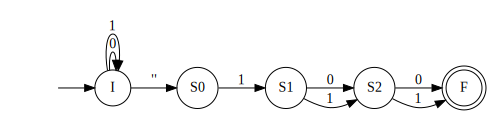

In [13]:
totalize_nfa_DC (NFA_antep1b)
print (totalize_nfa_DC (NFA_antep1b))
dotObj_nfa(totalize_nfa_DC (NFA_antep1b))

## Execução de um Autómato

Após várias funções ao nível da visualização e da coerência dos NFA é também clara a importância de operações ao nível da execução de um autómato. 

Desta forma, seguindo a definição estudada, o primeiro passo para a implementação da execução de um autómato será generalizar a função de transição $\delta$ por forma a aceitar um conjunto de estados como argumento: 

$\delta : \mathcal{P}(Q) \times \Sigma_\varepsilon \to \mathcal{P}(Q)$

$\delta(Q,x) = \bigcup_{q \in Q}\ \ \delta(q,x)$


É importante notar que o autómato pode não ter uma representação total, e que a função pode ser executada muitas vezes, por isso o esforço computacional de o totalizar pode ser significativo, e será preferível testar, para cada estado `q` pertencente a `S`, se `(q,c)` pertence ao domínio da função de transição, no caso de não pertencer, deverá ser considerada a transição para o conjunto vazio de estados. 
    
    
    
Assim, a função `step_nfa_DC` tem precisamente esse racíocinio base para a sua definição. Inicialmente, após verificarmos os seguintes 3 pontos, ou seja:
* se o autómato é coerente;
* se o conjunto de estados recebido é um sub-conjunto do conjunto de estados, isto é se todos os elementos pertencem ao conjunto de estados do autómato;
* se o símbolo recebido pertence então ao alfabeto do autómato, incluindo ainda a palavra vazia $\varepsilon$.

Após isto, optámos pela implementação de um ciclo while, onde após criada uma lista do conjunto de estados que a função recebe, enquanto esta for vazia vai testar para cada par (x,y), onde x é um estado da lista e y o símbolo recebido, se este par pertence a uma das chaves da função delta. Por um lado:
* caso se verifique vamos então fazer uso da capacidade do jove que nos permite calcular o valor dessa chave;
* caso contrário, iremos então retornar o conjunto vazio.



In [14]:
def step_nfa_DC (N, S, c):

    assert is_consistent_nfa(N), "step_nfa given inconsistent NFA N"
    assert S <= N["Q"], "step_nfa given states S not in N"
    assert c in (N["Sigma"] | set({""})), "step_nfa given symbol c not in N"
    

    L = list (S)
    A= set ({})
    q=0
    while L != []:
        if (L[q],c) in N["Delta"].keys():
            A= A.union(N["Delta"][(L[q],c)])
            L= L[1:]    
        else:
            A= A
            L= L[1:]
             
    return A


Será então importante ilustrar  a função de `step_nfa_DC` com vários exemplos, onde dado um conjunto de estados e um símbolo indica-nos para onde transitará cada estado recebido mediante a leitura desse símbolo.

In [15]:
print (step_nfa_DC(NFA_antep1b, {"I","S1"}, "1"))

{'S2', 'I'}


In [16]:
print (step_nfa_DC(NFA_antep1b, {"I","F"}, "1"))

{'I'}


In [17]:
print (step_nfa_DC(NFA_antep1b, {"S2","S0"}, "0"))

{'F'}


### Função $\mathrm{Close}_\varepsilon$ (exercício proposto pelo professor)

Igualmente importante será também a função $\mathrm{close}_\varepsilon$. Relembrando,  $\mathrm{close}_\varepsilon  (Q)$ corresponde ao conjunto de estados acessível por uma qualquer sequência de transições espontâneas, lendo a palavra vazia, a partir do conjunto $Q$ de estados. Alertamos que este cálculo é iterativo, uma vez que para cada novo estado calculado pode haver mais transições $\varepsilon$ a partir dele. 

Por exemplo no autómato seguinte, $\mathrm{close}_\varepsilon  (I)$ contém todos os estados do autómato.

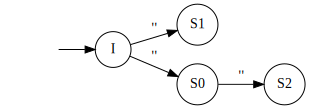

In [18]:
NFA_testEclosure = { 'Q': {'I', 'S0', 'S1', 'S2'},
                     'Sigma': {'0', '1'},
                     'Delta': { # 
                               ('I', '')  : {'S0','S1'},
                                #
                                ('S0', '')  : {'S2'},
                                 
                              },
                     'Q0': {'I'}, 
                     'F' : set({})   
                   }

dotObj_nfa(NFA_testEclosure)

Desta forma uma nota importante é que a definição da função `closeE_DC`tem por base um cálculo iterativo, uma vez que para cada novo estado calculado pode haver mais transições $\varepsilon$ a partir dele, como é o caso de _S0_ que é alcançado a partir de _I_ mas por sua vez, a partir de _S0_ pela leitura da palavra vazia ainda alcançámos outro estado o _S2_. 


Apresentamos a seguir a nossa definição para a função `closeE_DC`. 
Notamos que mais uma vez o autómato pode não ter uma representação total, e será necessário testar, para cada estado `q` alcançado, se `(q,"")` pertence ao domínio da função de transição. 

Assim, primeiramente passámos por verificar dois pontos:
* a coerência do autómato recebido;
* se o conjunto de estados recebido é sub-conjunto do conjunto de estados $Q$ do autómato.


Posteriomente, iniciámos um ciclo `while`:
* inicialmente, guardámos na variável _Previous_ os estados que o autómato recebe;
* na variável _new_states_ vamos guardar o resultado do conjunto da aplicação da função `step_nfa_DC`, anteriormente calculada, que então irá devolver-nos como resultado o conjunto de estados que se obtém a partir do estados recebidos mediante a leitura da palavra vazia $\epsilon$. 
* de seguida, vamos alterar o valor da variável States para ser a união do conjunto de estados, new_states, e os que estavam guardados na variável Previous. 


O ciclo é fechado quando a variável _States_ é igual à _Previous_, o que acontece quando o resultado de aplicar a `step_nfa_DC` aos estados é o conjunto vazio, o que siginifca que não existe mais nenhum estado possível de alcançar pela leitura da palavra vazia. 

In [19]:
def closeE_DC (Nfa, States):
    
    assert is_consistent_nfa(Nfa), "closeE given inconsistent Nfa"
    assert States <= Nfa["Q"], "closeE given states not in Nfa"

    while True : 
        Previous = States 
        
        new_states = step_nfa_DC (Nfa, States, "") 
        #print(new_states)
        
        States = new_states | (Previous)
        #print (States)
        
        if States == Previous: 
            break
    
    return (States)

In [20]:
Q= {'I', 'S0', 'S1'}
M= {'I', 'S0'}
if M.intersection (list (Q)) != []:
    print ('True')
else:
    print ('False')
    print (list (M))

True


In [21]:
closeE_DC (NFA_testEclosure, {'I'})

{'I', 'S0', 'S1', 'S2'}


### N Passos 

Escritas as duas funções anteriores, podemos implementar a função que calcula o conjunto de estados activos depois da leitura de uma palavra. Para tal é importante ter como base que:

$\hat{\delta}(Q, \varepsilon)\ \ \ =\ \mathrm{close}_\varepsilon (Q)$

$\hat{\delta}(Q, xs)\ = \hat{\delta}(Q',s)$,          com          $Q' = \mathrm{close}_\varepsilon(\delta(\mathrm{close}_\varepsilon (Q), x))$


Assim, a seguinte função recursiva implementa esta função (o primeiro parâmetro é o autómato), e `run_nfa_DC` executa o autómato desde o conjunto de estados iniciais. 

No caso da `run_nfa_helper` recebe um triplo e aplica então o racícinio anterior, ou seja, inicialmente guarda na variável states o resultado da aplicação da função `closeE_DC` ao autómato e aos estados que recebidos. 

Posteriormente, se a palavra for vazia retornaremos então o que está guardado na variável states, caso contrário a variável states passará a ser o conjunto de estados pela aplicação da função `closeE_DC` mas, desta vez ao par (x,y), onde x é o autómato recebido e y o estados alcançados a partir dos states pela leitura do símbolo da palavra correpondente ao primeiro símbolo da palavra.

De seguida, aplica-se a recursividade chamando a função `run_nfa_helper` aplicando-a ao autómato, à variável states e agora à cauda da palavra.

In [22]:
#adaptação da definição fornecida pelo professor
def run_nfa_helper(N, states, s):

    assert is_consistent_nfa(N), "step_nfa given inconsistent NFA N"
    assert states <= N["Q"], "step_nfa given states S not in N"
    
    states = closeE_DC(N, states)
    if s=="":
        return states
    else:
        states = closeE_DC(N, step_nfa_DC (N, states, s[0]))
        #print (step_nfa_DC (N, states, s[0]))
        #print(states)
        return run_nfa_helper(N, states, s[1:])


def run_nfa_DC(N, s):
    return run_nfa_helper(N,  N["Q0"], s)
   
    
run_nfa_DC(NFA_antep1b, '0100')    

{'F', 'I', 'S0'}

### Versão não-recursiva (usando um ciclo) da função `run_nfa_DC` (exercício proposto pelo professor).

Como é de fácil perceção a função anterior `run_nfa_DC` tem como base uma implementação recursiva, pelo que, de seguida, apresentaremos a mesma função e claro está com o mesmo objetivo, todavia, a partir de uma versão não-recursiva. 

Para tal decidimos manter o mesmo racícionio ao usar uma função extra que recebe um triplo. Nesta função, `run_nfa_helper1` optámos pela utilização de um ciclo `for`. Assim após novamente garantirmos estes 2 pontos:
* a) o autómato recebido é coerente;
* b) os estados recebidos são um sub-conjunto do conjunto de estados do autómato;

O ciclo `for` será executado com base no comprimento da palavra, ou seja para todos os i em range (len (s)) . Assim, inicialmente guardaremos na variável states os estados atingidos mediante a leitura da palavra vazia, a partir dos estados recebidos. Posto isto,  a variável states irá ser alterada passando a ser o conjunto de estados pela aplicação da função `closeE_DC` mas, desta vez ao par (x,y), onde x é o autómato recebido e y o estados alcançados a partir dos states pela leitura do símbolo da palavra correpondente à posição (i). A seguir iremos então alterar o valor de i para +1, a fim de aplicar aos restantes símbolos da palavra. 

No final, a função irá então retornar o conjunto de estados ativos. Como queremos que a aplicação resulta a partir dos estados iniciais, a função `run_nfa_DC1`irá então chamar a função ` run_nfa_helper1 `mas partindo dos estados iniciais.

In [23]:
def run_nfa_helper1(N, states, s):

    assert is_consistent_nfa(N), "step_nfa given inconsistent NFA N"
    assert states <= N["Q"], "step_nfa given states S not in N"
    
    
    for i in range (len (s)):
        states = closeE_DC(N, states)
        #print (states)
        states = (closeE_DC(N, step_nfa_DC (N, states, s[i])))
        #print (states)
        i= i+1 
    return (states)
            


In [24]:
def run_nfa_DC1(N, s):
    return run_nfa_helper1(N,  N["Q0"], s)

De seguida, apresentámos então aplicações da função `run_nfa_DC1 `.

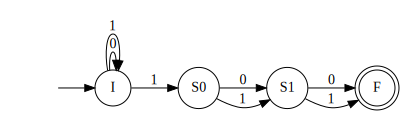

In [25]:
dotObj_nfa(NFA_antep1a)

In [26]:
run_nfa_DC1(NFA_antep1a, '0100')

{'F', 'I'}

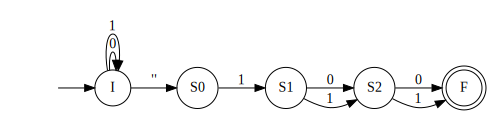

In [27]:
dotObj_nfa(NFA_antep1b)

In [28]:
run_nfa_DC1(NFA_antep1b, '0100')

{'F', 'I', 'S0'}

Desta forma, confirmamos a validade da função escrita.

### Função de Aceitação
Podemos agora escrever facilmente o predicado que decide se uma palavra é ou não aceite por um autómato NFA. Para tal, precisámos apenas de usar a função `run_nfa_DC` e para o resultado desta função que correponde a um conjunto de estados ativos pela leitura de uma palavra s, vamos verificar se algum desses estados é final. Caso se verifique, a função devolve True e também o estado final do autómato que garante essa aceitação. Caso contrário, devolve simplesmente False.

In [29]:
#definição fornecida pelo professor
def accepts (N, s) : 
    S = run_nfa_DC(N, s)
    for q in S : 
        if q in N["F"]:
            return (True, q)
    return False

Apresentámos de seguida um outro autómato (NFA23).

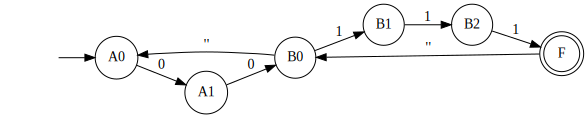

In [30]:
NFA23 = { 'Q': {'A0','A1','B0','B1','B2','F'},
          'Sigma': {'0', '1'},
          'Delta': { # 
                     ('A0', '0') : {'A1'},
                     ('A1', '0') : {'B0'},
                     #
                     ('B0', '')  : {'A0'},
                     #
                     ('B0', '1') : {'B1'},
                     ('B1', '1') : {'B2'},
                     ('B2', '1') : {'F'},
                     # 
                     ('F', '')   : {'B0'},
                   },
          'Q0': {'A0'}, 
          'F' : {'F'}   
        }
dotObj_nfa(NFA23)

De seguida, ilustrámos vários exemplos pela aplicação das 3 funções, anteriormente, descritas ao autómato anterior:
* `run_nfa_DC`- a versão recursiva;
* `run_nfa_DC1`- a versão não recursiva;
* `accepts`

In [31]:
# Expected Results: set(), {'B0', 'A0'}, {'A0', 'B0', 'F'}, {'A1'}, {'B1'}

print(run_nfa_DC(NFA23, "01"))
print(run_nfa_DC(NFA23, "00"))
print(run_nfa_DC(NFA23, "00111"))
print(run_nfa_DC(NFA23, "001110"))
print(run_nfa_DC(NFA23, "001111"))
print(run_nfa_DC(NFA23, "0011111"))
print(run_nfa_DC(NFA23, "0011100111"))
print()
print(run_nfa_DC1(NFA23, "01"))
print(run_nfa_DC1(NFA23, "00"))
print(run_nfa_DC1(NFA23, "00111"))
print(run_nfa_DC1(NFA23, "001110"))
print(run_nfa_DC1(NFA23, "001111"))
print(run_nfa_DC1(NFA23, "0011111"))
print(run_nfa_DC1(NFA23, "0011100111"))
print()
print(accepts(NFA23, "01"))
print(accepts(NFA23, "00"))
print(accepts(NFA23, "00111"))
print(accepts(NFA23, "001110"))
print(accepts(NFA23, "001111"))
print(accepts(NFA23, "0011111"))
print(accepts(NFA23, "0011100111"))

set()
{'B0', 'A0'}
{'B0', 'F', 'A0'}
{'A1'}
{'B1'}
{'B2'}
{'B0', 'F', 'A0'}

set()
{'B0', 'A0'}
{'B0', 'F', 'A0'}
{'A1'}
{'B1'}
{'B2'}
{'B0', 'F', 'A0'}

False
False
(True, 'F')
False
False
False
(True, 'F')


### Função de Aceitação com Cálculo dos Estados Intermédios (Caminho) (exercício proposto pelo professor)

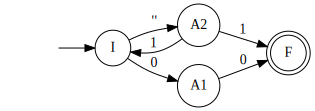

In [32]:
yaNFA = { 'Q': {'I','A1','A2','F'},
          'Sigma': {'0', '1'},
          'Delta': { # 
                     ('I', '0') : {'A1'},
                     ('I', '') : {'A2'},
                     #
                     ('A1', '0') : {'F'},
                     ('A2', '1') : {'I','F'},
                   },
          'Q0': {'I'}, 
          'F' : {'F'}   
        }
dotObj_nfa(yaNFA)

A função de aceitação dada em cima sofre de uma limitação: não é fácil adaptá-la para devolver também, além do estado final, também o *caminho* percorrido, ou seja, a sequência de estados desde um dos estados iniciais até um dos estados finais.

É possível usar uma abordagem alternativa que permite este cálculo, fazendo uma _travessia em profundidade_ do autómato. Pretende-se agora escrever uma função recursiva `accepts_df (N, q, s, path)` que, com início no estado `q`, faz uma travessia recursiva e devolve um par `(done, p)`, em que `done` é um Booleano que indica se a palavra `s` é aceite, e `p` é o caminho percorrido desde `s` até um estado final do autómato, caso a palavra seja aceite. 

Recorde que numa pesquisa em profundidade tradicional percorre-se todos os vértices adjacentes ao actual, iniciando-de recursivamente uma travessia em cada adjacente _que não tenha ainda sido visitado antes_.  Na função `accepts_df` pretende-se algo diferente:
* por um lado, interessam apenas os adjacentes para os quais se transita consumindo o primeiro caracter da string; por exemplo no autómato acima se `q` for A2 e `s` começar por 0, não haverá nenhuma chamada recursiva. Mas se `s` começar por 1 haverá _duas_ chamadas, uma com início em F e outra com início em I
* interessam também os adjacentes para os quais se transita pela palavra vazia, qualquer que seja o primeiro símbolo da palavra `s`. Por exemplo a partir de I, 
* por outro lado, não deve haver qualquer controlo dos visitados: pode-se passar várias vezes pelo mesmo estado. A garantia de terminação do algoritmo é dada pelo facto de a palavra ser finita

Em conta que em cada invocação recursiva a palavra perderá o seu primeiro símbolo, que é consumido na transição, excepto se for uma transição pela palavra vazia. 

Caso uma chamada recursiva devolva `(True, p)` então a chamada actual devolverá  (`True` [s]+p). Em caso contrário devolverá `(False, [])`. 

Escreva esta função, e também uma função de topo `accepts_withpath (N, s)` que chama `accepts_df` com os estados iniciais do autómato. Teste esta função, nomeadamente como os seguinte exemplos. 
 
 
 
Analisámos a função, primeiramente, a função `accepts_df` que tem como base o anteriormente explicado. Nesse sentido existem vários casos ao nível desta função, onde os abordaremos pela ordem descrita na função:
* **1.** No caso da palavra ser uma palavra vazia, indicará, possivelmente, que todos os símbolos da palavra já terão sido lidos. Assim, nesta fase, dado o critério de aceitação dos NFA ser por base em *final state*, se o estado em que se encontra a função for um estado final do autómato a função retornará o par (True, path), indicando verdade para a aceitação da palavra e o seu percurso até lá.


* **2.** Uma das grandes características pertencentes aos NFA é a possibilidade da leitura da palavra vazia. Ora isto dando uma palavra à nossa função implicará desde já que nenhum símbolo da palavra seja contido e que se abram em alguns autómatos dois possíveis caminhos que possam levar à aceitação da palavra. Nesse sentido, tivemos de incluir na função esta possibilidade indicando-lhe que caso o caminho a partir da leitura da palavra vazia não leve a um estado final irá ser tentado o caminho a partir de um símbolo da palavra.

    Desta forma, é isso então que fazemos, caso exista uma transição nas chaves da função de transição que inclua o estado do autómato e o primeiro símbolo da palavra e se existe uma transição que inclua o nosso estado atual e a palavra vazia, primeiramente iremos verificar se a aceitação da 2ª coordenada do tuplo (N, qn, s, path), que é o caminho incluí um estado final do autómato, onde qn é um dos valores associados à chave da função de transição. 
    
    Caso se verifique a presença de um estado final, então iremos optar por este caminho chamando cada um dos valores da chave associado à transição do estado q mediante a leitura da palavra vazia e adicionando então este valor (que é um estado do autómato) ao nosso caminho. De seguida, aplicaremos então a recursividade chamando novamente a função, neste caso, a partir do novo estado, pela leitura da palavra já recebida, dado que a leitura da palavra vazia não leva ao consumo de nenhum símbolo, e a partir no nosso novo caminho. 
    
    Caso não se verifique a presença de um estado final no caso anteriormente descrito, optaremos então por um possível caminho mediante a leitura do 1º símbolo da palavra. Desta forma, a cada valor associado ao par (q, s[0]), onde q é o estado onde nos encontrámos e s[0] o 1ª símbolo da palavra, iremos juntar esse valor, que é um novo estado, ao nosso caminho e desta forma prosseguir, chamando novamente a função para verificar a aceitação agora a partir do novo estado e da palavra execeto o seu 1ª símbolo dado que este foi agora mesmo consumido.
    

* **3.** No caso de não se verificar esta possibilidade de poderem existir dois caminhos, podemos simplesmente ter o caso onde o caminho passará pela leitura de símbolos. Claro que dado o alfabeto do autómato existirão vários símbolos, pelo que aqui importa é perceber se existe um caminho pela leitura do 1º símbolo da palavra. Caso haja esta transição para cada valor possível desta chave iremos então adicioná-lo ao nosso caminho. Posteriormente, chamaremos a função mas agora para verificar a aceitação a partir do novo estado e da palavra com a exceção do 1º símbolo dado que foi agora consumido. 


* **4.** Pode ainda existir o caso de a possibilidade de prosseguir seja mediante a leitura da palavra vazia. Nesse caso, signfica que existe um conjunto de estados associados a esta transição. Pelo que então para cada um deles iremos então adicioná-los ao nosso caminho e, de seguida, chamar, novamente, a função mas agora a partir do novo estado e de toda a palavra, dado que a leitura da palavra vazia, não implica o consumo de qualquer símbolo da palavra


Assim, caso não se verifique qualquer transição a função retornará (False, []), indicando, assim, que a palavra não é aceite não existindo, então nenhum caminho. 


Relativamente, então, à função `accepts_withpath`, esta receberá um autómato e uma palavra. Assim, utilizaremos a função `accepts_df` esta que recebe um tuplo (N, q, s, path), onde:
* N- corresponde ao autómato, já recebido;
* q- cada um dos estados iniciais, dado que os NFA tem a possibilidade de ter mais do que um estado inicial.
* s- corresponde à palavra, já recebida;
* path- que será então uma lista que incluirá já o estado inicial pelo qual vamos partir e desenhar o nosso possível caminho que levará à possível aceitação de uma palavra.  
    

In [33]:
def accepts_df (N, q, s, path):
    
    if s == "" and q in N["F"]:
        return (True, path)  
    
    if s != "" and (q,s[0]) in N['Delta'].keys():
        if (q,'') in N['Delta'].keys():
            for (qn)  in N['Delta'][(q,"")] :
                for i in N["F"]:
                    if i in accepts_df (N, qn, s, path) [1]:
                        for (qn) in N['Delta'][(q,"")]:
                            path =  path + [qn]
                            return (accepts_df (N, qn, s, path))
                            
                    if i not in accepts_df (N, qn, s, path) [1]:
                        for (qn) in N['Delta'][(q,s[0])]:
                            path =  path + [qn]
                            return accepts_df (N, qn, s[1:], path) 
    
      
        
    if (q,'') in N['Delta'].keys():
        for (qn)  in N['Delta'][(q,"")] :
            path =  path + [qn]
            return accepts_df (N, qn, s, path)
        
    if s != "" and (q,s[0]) in N['Delta'].keys():
        for (qn) in N['Delta'][(q,s[0])]:
            path =  path + [qn] 
            return accepts_df (N, qn, s[1:], path)  

    return (False, [])

In [34]:
def accepts_withpath (N, s):
    
    for i in N["Q0"]:
        return accepts_df (N, i, s, [i])
    

In [35]:
# (False, [])
print(accepts_withpath(NFA23, "01"))

# (False, [])
print(accepts_withpath(NFA23, "00"))

# (True, ['A0', 'A1', 'B0', 'B1', 'B2', 'F'])
print(accepts_withpath(NFA23, "00111"))

# (False, [])
print(accepts_withpath(NFA23, "001110"))

# (False, [])
print(accepts_withpath(NFA23, "001111"))

# (False, [])
print(accepts_withpath(NFA23, "0011111"))

# (True, ['A0', 'A1', 'B0', 'B1', 'B2', 'F', 'B0', 'A0', 'A1', 'B0', 'B1', 'B2', 'F'])
print(accepts_withpath(NFA23, "0011100111"))

# (True, ['I', 'S0', 'S1', 'S2', 'F'])
print(accepts_withpath(NFA_antep1b, "111"))

# (True, ['I', 'S0', 'S1', 'F'])
print(accepts_withpath(NFA_antep1a, "111"))



(False, [])
(False, [])
(True, ['A0', 'A1', 'B0', 'B1', 'B2', 'F'])
(False, [])
(False, [])
(False, [])
(True, ['A0', 'A1', 'B0', 'B1', 'B2', 'F', 'B0', 'A0', 'A1', 'B0', 'B1', 'B2', 'F'])
(True, ['I', 'S0', 'S1', 'S2', 'F'])
(False, [])
